In [0]:
#Priya Rajpurohit 2015073
#Sakshi Saini 2017092

In [0]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers.core import Layer
import keras.backend as K

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split


In [0]:
# ds = tfds.load("plant_village", split=tfds.Split.TRAIN, batch_size=-1)
# ds = tfds.as_numpy(ds)

# images, labels = ds["image"], ds["label"]


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/Segmented.zip" 

In [0]:
import os

path = '/content/Segmented/'
images=[]
labels=[]
# r=root, d=directories, f = files
lable = 1
labels = []
for r, d, f in os.walk(path):
    for folder in d:
        
        for r1, d1, f1 in os.walk(os.path.join(r, folder)):
          for file in f1:
            # print(file)
            images.append( cv2.imread(os.path.join(r1, file) ))
            labels.append(lable)

          lable = lable +1
images=np.array(images)
images.shape

(48153, 256, 256, 3)

In [0]:
x_train, x_test, y_train, y_test = train_test_split( images[:10000], labels[:10000], test_size=0.3, random_state=42, shuffle=True )
print(x_train.shape, x_test.shape)


(7000, 256, 256, 3) (3000, 256, 256, 3)


In [0]:
from keras.models import Model

image_input = Input(shape=(224,224, 3))
 
res=Xception(input_tensor=image_input,weights='imagenet', include_top=False)
res.layers.pop()
for layer in res.layers:
  layer.trainable = False
res = Model(inputs=res.inputs, outputs=res.layers[-1].output)
model = Sequential()
model.add(res)
model.add(GlobalAveragePooling2D(name='avg_pool') )  
model.add(Dense(256, activation='relu', input_shape=res.output_shape[1:]))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))    

model.add(Dense(38, activation='softmax'))


# x = GlobalAveragePooling2D()(res.output)
# x=Dropout(0.3)(x)
# x=Dense(1024,activation='relu')(x) #dense layer 2
# x=Dense(512,activation='relu')(x)


# prediction = Dense(38, activation='softmax')(x)

model.summary()

83689472/83683744 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 7, 7, 2048)        20861480  
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_______________________________________________________

In [0]:
# # X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
# # X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])


#images, labels = ds["image"], ds["label"]
n1 = 224
m1 = 224


features = []
for image in x_train:

  image = cv2.resize(image , (n1,m1) )

  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  feature = model.predict(image)
  
  features.append(feature)

featurestest = []
for image in x_test:

  image = cv2.resize(image , (n1,m1) )

  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  feature = model.predict(image)
  
  featurestest.append(feature)

In [0]:

resized = []
n = 224
m = 224

for image in x_train:
  image = cv2.resize( image, (n, m) )
  resized.append(image)
resized_t = []
n = 224
m = 224

for image in x_test:
  image = cv2.resize( image, (n, m) )
  resized_t.append(image)


In [0]:
features = np.array(features)
featurestest=np.array(featurestest)

y_train1 = np_utils.to_categorical(y_train, 38)
y_test1 = np_utils.to_categorical(y_test, 38)


In [0]:
print(featurestest.shape)
print(features.shape)
y_train1.shape

(3000, 1, 38)
(7000, 1, 38)


(7000, 38)

In [0]:
resized=np.array(resized)
resized_t=np.array(resized_t)

In [0]:

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history1=model.fit(resized,y_train1, validation_data=(resized_t,y_test1),batch_size=100,epochs=10,shuffle=True)


Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 244s 35ms/step - loss: 1.9870 - accuracy: 0.4634 - val_loss: 128.8195 - val_accuracy: 0.2330
Epoch 2/10
7000/7000 [==============================] - 243s 35ms/step - loss: 0.8045 - accuracy: 0.7621 - val_loss: 57.5469 - val_accuracy: 0.0913
Epoch 3/10
7000/7000 [==============================] - 274s 39ms/step - loss: 0.5595 - accuracy: 0.8333 - val_loss: 130.7538 - val_accuracy: 0.1360
Epoch 4/10
7000/7000 [==============================] - 276s 39ms/step - loss: 0.4083 - accuracy: 0.8770 - val_loss: 128.2815 - val_accuracy: 0.0627
Epoch 5/10
7000/7000 [==============================] - 273s 39ms/step - loss: 0.4238 - accuracy: 0.8800 - val_loss: 221.7230 - val_accuracy: 0.2177
Epoch 6/10
7000/7000 [==============================] - 273s 39ms/step - loss: 0.3254 - accuracy: 0.9070 - val_loss: 82.7719 - val_accuracy: 0.0760
Epoch 7/10
7000/7000 [==============================] - 273s

In [0]:
!mkdir -p saved_model
#tpu_model.save('saved_model/AlexNet') 
model.save('saved_model/Xception') 

In [0]:
final_accuracy = history1.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")


FINAL ACCURACY MEAN-5:  0.11806666627526283


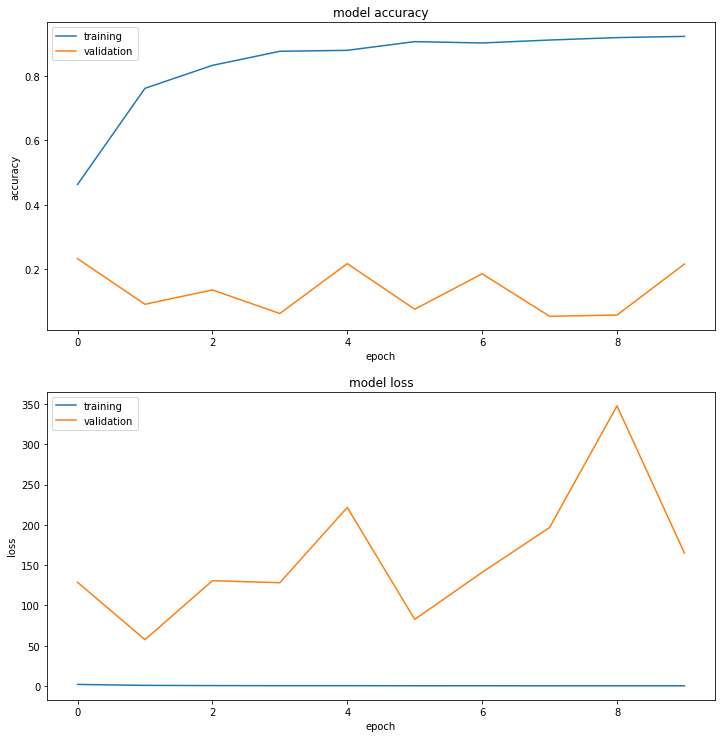

In [0]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history1.history['accuracy'], history1.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history1.history['loss'], history1.history['val_loss'], 'loss', 212)

In [0]:
n1=224
m1=224
features1 = []
for image in x_train:

  image = cv2.resize(image , (n1,m1) )

  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  feature = res.predict(image)
  
  features1.append(feature)

featurestest1 = []
for image in x_test:

  image = cv2.resize(image , (n1,m1) )

  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  feature = res.predict(image)
  
  featurestest1.append(feature)
features = np.array(features1)
featurestest=np.array(featurestest1)

In [0]:
features.shape

(7000, 1, 7, 7, 2048)

In [0]:
from sklearn.ensemble import RandomForestClassifier

features = features.reshape(7000,100352)

clf = RandomForestClassifier()
clf.fit(features,  y_train1)
featurestest = featurestest.reshape(3000,100352)

accuracy = clf.score(featurestest,y_test1)
accuracy *= 100
print(accuracy)
import h5py


h5_data    = 'segmented_xception.h5'
h5_labels  = 'labels_xception_seg.h5'

h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))
h5f_data.close()
h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(y_train1))
h5f_label.close()
import pickle


filename = 'xception_rf_model_seg.sav'
pickle.dump(clf, open(filename, 'wb'))

77.73333333333333


In [0]:
from sklearn import svm

#features = features.reshape(16000,38)

clf1 = svm.SVC()
clf1.fit(features,  y_train)
#featurestest = featurestest.reshape(4000, 38)

accuracy = clf1.score(featurestest,y_test)
accuracy *= 100
print(accuracy)
import h5py





filename = 'xception_svm_model_seg.sav'
pickle.dump(clf1, open(filename, 'wb'))

97.83333333333334


In [0]:
!cp xception_svm_model_seg.sav "/content/drive/My Drive/Xception_seg_low"
!cp xception_rf_model_seg.sav "/content/drive/My Drive/Xception_seg_low"
!cp segmented_xception.h5 "/content/drive/My Drive/Xception_seg_low"
!cp labels_xception_seg.h5 "/content/drive/My Drive/Xception_seg_low"
!cp model.h5 "/content/drive/My Drive/Xception_seg_low"
!cp model.json "/content/drive/My Drive/Xception_seg_low"
!cp -r saved_model "/content/drive/My Drive/Xception_seg_low"

cp: cannot stat 'xception_svm_model_seg.sav': No such file or directory
cp: cannot stat 'xception_rf_model_seg.sav': No such file or directory
cp: cannot stat 'segmented_xception.h5': No such file or directory
cp: cannot stat 'labels_xception_seg.h5': No such file or directory
cp: cannot stat 'model.h5': No such file or directory
cp: cannot stat 'model.json': No such file or directory
cp: cannot stat 'saved_model': No such file or directory


In [0]:
# !pip3 install elm
# !pip3 install --upgrade numpy folium imgaug

In [0]:
# import elm
# elmk=elm.ELMKernel()
# elmk.search_param(data, cv="kfold", of="accuracy", eval=10)

# tr_result = elmk.train(features,y_train)
# te_result = elmk.test(featurestest,y_test)

# print(te_result.get_accuracy)
